In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_cat = pd.read_excel('/content/TRAIN_CATEGORICAL_METADATA.xlsx')
df_quant = pd.read_excel('/content/TRAIN_QUANTITATIVE_METADATA.xlsx')
df_solution = pd.read_excel('/content/TRAINING_SOLUTIONS.xlsx')

In [9]:
df_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [10]:
df_quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [11]:
df_solution.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [14]:
df = df_cat.merge(df_quant, on='participant_id', how='inner') \
           .merge(df_solution, on='participant_id', how='inner')
df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,...,4,11,4,10,7,3,9,8.940679,1,1


ADHD_Outcome
1    831
0    382
Name: count, dtype: int64


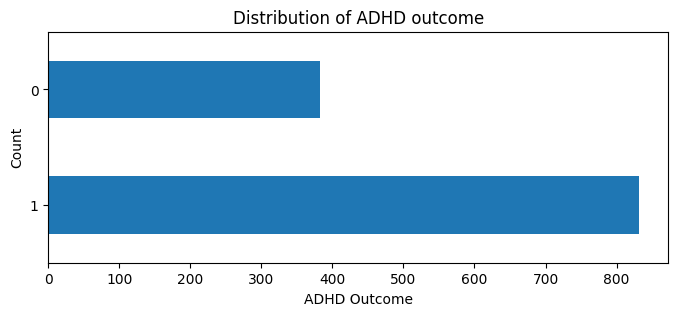

In [24]:
print(df['ADHD_Outcome'].value_counts())
df['ADHD_Outcome'].value_counts().plot(kind='barh', figsize=(8,3))
plt.title('Distribution of ADHD outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.show()

Sex_F
0    797
1    416
Name: count, dtype: int64


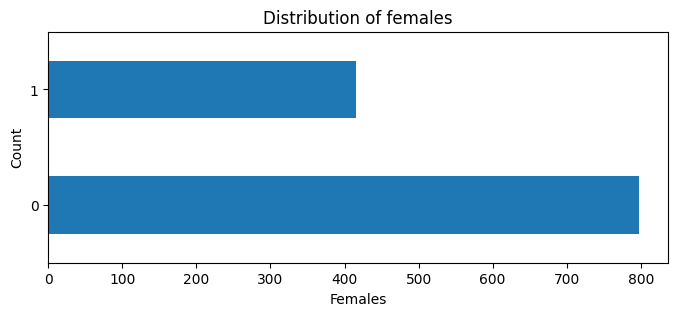

In [25]:
print(df['Sex_F'].value_counts())
df['Sex_F'].value_counts().plot(kind='barh', figsize=(8,3))
plt.title('Distribution of females')
plt.xlabel('Females')
plt.ylabel('Count')
plt.show()

In [28]:
# finding duplicated samples
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
 10  EHQ_EHQ_Total                     1213 non-null   float64
 11  ColorVision_CV_Score              1213 non-null   int64  
 12  APQ_P_

In [31]:
# Missing data
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
       print(index, row[0])

PreInt_Demos_Fam_Child_Ethnicity 11
MRI_Track_Age_at_Scan 360


In [34]:
# removing variables
df = df.drop(['participant_id', 'Basic_Demos_Enroll_Year'], axis=1)
df.head()

,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,1,0.0,0,1,21,45,21,45,40.00,13,...,1,5,0,5,1,0,10,NaN,1,1
1,3,1.0,2,3,15,15,0,0,-94.47,14,...,6,8,7,8,10,4,5,NaN,1,0
2,1,1.0,8,1,18,40,0,0,-46.67,14,...,2,8,5,7,6,4,9,8.239904,1,0
3,3,0.0,8,3,15,30,18,0,-26.68,10,...,4,16,9,10,8,4,6,NaN,1,1
4,3,0.0,1,3,15,20,0,0,0.00,14,...,4,11,4,10,7,3,9,8.940679,1,1


In [35]:
df_age_count = df['MRI_Track_Age_at_Scan'].isnull().sum()
total_count = len(df)
missing_count = (df_age_count / total_count) * 100
print(f"Missing count: {missing_count:.2f}%")

Missing count: 29.68%


In [37]:
df['MRI_Track_Age_at_Scan'].max()

21.564453

In [38]:
df.groupby('PreInt_Demos_Fam_Child_Race')['MRI_Track_Age_at_Scan'].mean()

,MRI_Track_Age_at_Scan
PreInt_Demos_Fam_Child_Race,
0,11.045230
1,11.464943
2,11.304201
3,11.168980
4,11.370115
7,7.905886
8,11.385662
9,12.745681
10,14.964655


Here, I intended to find correlation between age and other test scores in order to estimate missing values in age. Unfortunately there is no strong correlation.

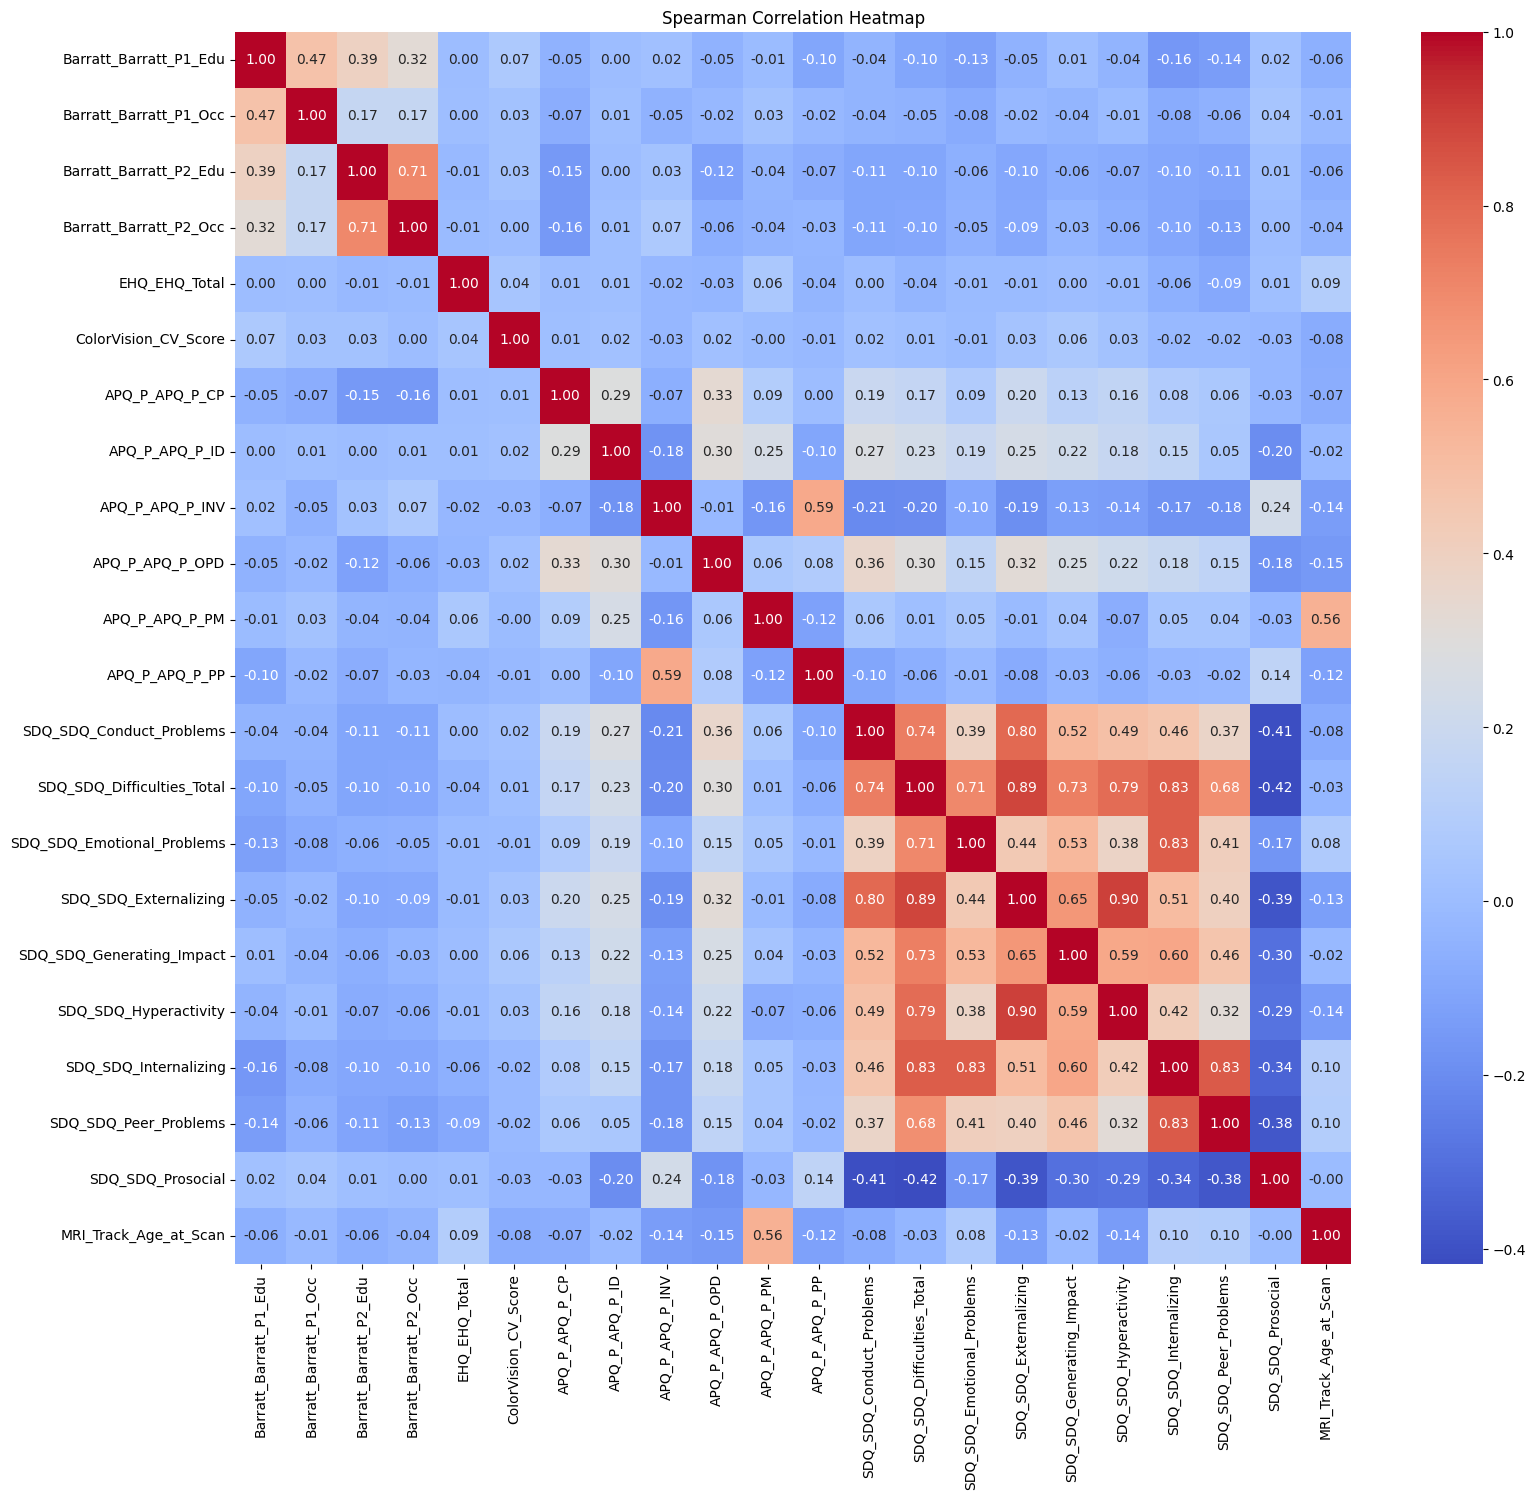

In [47]:
# Because we have ordinal categorical variables it is better to compute Spearman’s Rank Correlation
df_corr = df.iloc[:, 4:-2]
df_corr.dropna(subset=['MRI_Track_Age_at_Scan'], inplace=True)

corr_matrix, _ = spearmanr(df_corr)

# Convert result into DataFrame for readability
corr_df = pd.DataFrame(corr_matrix, index=df_corr.columns, columns=df_corr.columns)

plt.figure(figsize=(18,16))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [49]:
from scipy.stats import shapiro, normaltest

# Shapiro-Wilk Test (for small samples)
shapiro_test = shapiro(df_corr['MRI_Track_Age_at_Scan'])
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

# D’Agostino’s K-Squared Test (for larger datasets)
dagostino_test = normaltest(df_corr['MRI_Track_Age_at_Scan'])
print(f"D’Agostino Test p-value: {dagostino_test.pvalue:.4f}")

Shapiro-Wilk Test p-value: 0.0000
D’Agostino Test p-value: 0.0000


In [50]:
# Compute skewness and kurtosis
skewness = df_corr['MRI_Track_Age_at_Scan'].skew()
kurtosis = df_corr['MRI_Track_Age_at_Scan'].kurt()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 0.54
Kurtosis: 0.06


#### Finding relationship between race and ethnicity to fill missing values in ethnicity.

In [52]:
df['PreInt_Demos_Fam_Child_Race'].value_counts()

,count
PreInt_Demos_Fam_Child_Race,
0,627
8,195
1,181
2,128
3,30
9,23
10,11
4,10
11,6


In [53]:
df['PreInt_Demos_Fam_Child_Ethnicity'].value_counts()

,count
PreInt_Demos_Fam_Child_Ethnicity,
0.0,809
1.0,296
2.0,77
3.0,20


In [55]:
# finding relationship between race and ethnicity
cross_tab = pd.crosstab(df['PreInt_Demos_Fam_Child_Race'], df['PreInt_Demos_Fam_Child_Ethnicity'])
print(cross_tab)

PreInt_Demos_Fam_Child_Ethnicity  0.0  1.0  2.0  3.0
PreInt_Demos_Fam_Child_Race                         
0                                 534   50   30    6
1                                 140   29    7    3
2                                   1  125    2    0
3                                  23    2    2    3
4                                   8    0    1    0
7                                   0    0    2    0
8                                  92   80   19    3
9                                  11    6    5    1
10                                  0    1    6    4
11                                  0    3    3    0


In [56]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 732.2804701524582, p-value: 6.528574674449882e-137


So, there is no significant relationship between race and ethnicity (p-value >= 0.05).